In [ ]:
#once installed, restart runtime and run again
import pandas as pd
import numpy as np
import time
import os
import plotly.express as px
import matplotlib.pyplot as plt
!pip install pympler
from pympler import asizeof
#pyarrow exports to ORC file type
import pyarrow as pa
import pyarrow.orc as orc
#pandavro exports to a Avro file type
!pip install pandavro
import pandavro as pdx
#use xlsxwriter as engine to write DataFrame to Excel format
!pip install xlsxwriter
#xport exports to a SAS file type
!pip install xport
import xport
import xport.v56

from IPython.display import clear_output
clear_output()

In [ ]:
#matplotlib graph parameters
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams.update({'font.size': 20})

|  Format Type |  Data Description     |  Reader        |  Writer           |  File Extension | Package Requirements |
| ------------ | --------------------- | -------------- | ----------------- | --------------- | -------------------- |
|  text        |  CSV                  |  read\_csv     |  to\_csv          |  .csv           | pandas               |
|  text        |  JSON                 |  read\_json    |  to\_json         |  .json          | pandas               |
|  binary      |  MS Excel             |  read\_excel   |  to\_excel        |  .xlsx          | pandas               |
|  binary      |  HDF5 Format          |  read\_hdf     |  to\_hdf          |  .h5            | pandas               |
|  binary      |  Feather Format       |  read\_feather |  to\_feather      |  .feather       | pandas               |
|  binary      |  Parquet Format       |  read\_parquet |  to\_parquet      |  .parquet       | pandas               |
|  binary      |  Stata                |  read\_stata   |  to\_stata        |  .dta           | pandas               |
|  binary      |  Python Pickle Format |  read\_pickle  |  to\_pickle       |  .pkl           | pandas               |
|  binary      |  ORC Format           |  read\_orc     |  orc.write\_table |  .orc           | pandas, pyarrow      |
|  binary      | SAS                   | read\_sas      | xport.v56.dump    | .xpt            | pandas, xport        |
|  binary      | Avro                  | read\_avro     | to\_avro          | .avro           | pandas, pandavro     |

<sup><sup/>
Source: [IO tools](https://pandas.pydata.org/docs/user_guide/io.html#io-parquet) from pandas.org

# **Text vs. Binary Formats**

**A text file is processed as a sequence of characters. Text input and output are encoded and decoded using character sets such as ASCII or Unicode.**

**A binary file is processed as a sequence of bytes. Binary files can contain bytes, images, sounds, compressed versions of other files. Binary format speeds up input/output relative to text files because the binary file format exactly matches the machine's natural in-memory format.**

**When a byte is written to a file, the original byte is copied into the file. When a byte is read from a file, the exact byte in the file is returned.**

**Both text and binary files are stored as binary data; the difference between the two is the bits in text files represent characters while the bits in binary files represent custom data.**

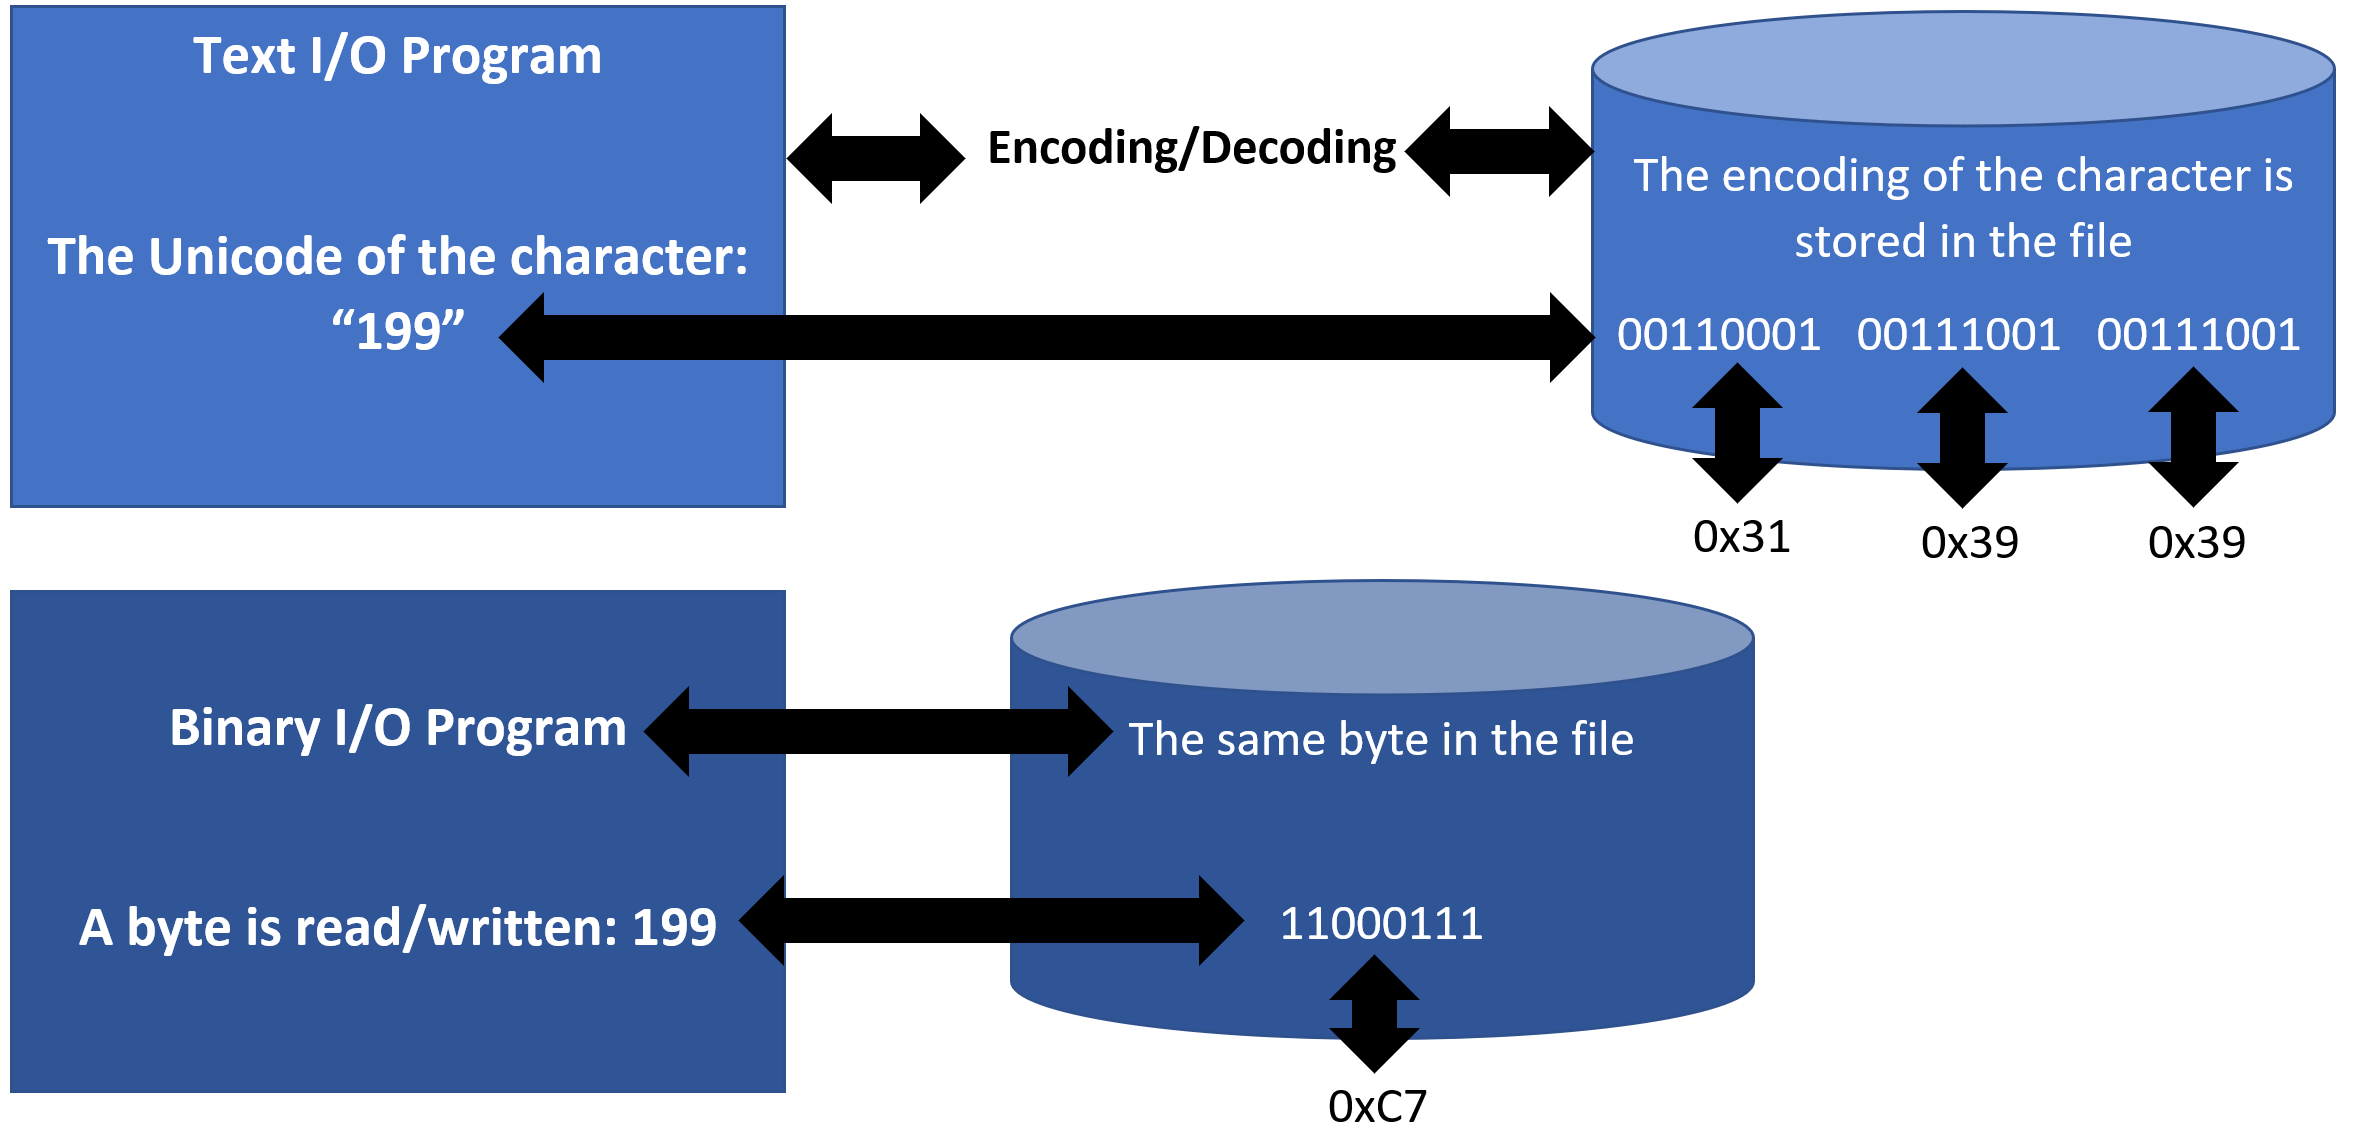

<sup><sup/>
Source: [Introduction to Programming and Computational Problem Solving](https://cseweb.ucsd.edu/classes/fa20/cse8B-a/lec18.pdf) from UC San Diego by Ben Ochoa

<sup><sup/>
Source:[Fixed-Width and Binary File I/O](https://www.cs.uaf.edu/2010/spring/cs202/lecture/02_04_binary_IO.html) from the University of Alaska Fairbanks by Orion Lawlor

In [ ]:
num_str = '199'
#the ord function returns the number representing the unicode code of a specified character
print([format(ord(i),'08b') for i in num_str])
#the hex function returns a rtring representing the hexadecimal value of a number
print([hex(ord(i)) for i in num_str])
#pympler's asizeof returns the combined size in bytes of all objects passed as positional arguments
print(f'The size of the string {num_str} in bytes is: {asizeof.asizeof(num_str)} bytes')

['00110001', '00111001', '00111001']
['0x31', '0x39', '0x39']
The size of the string 199 in bytes is: 56 bytes


In [ ]:
int_num = 199
#if byteorder is "big" the most significant byte is at the beginning of the byte array
int_to_hex = int_num.to_bytes(2,'big')
print(int_to_hex)
print(bin(199))
print(int.from_bytes(int_to_hex,'big'))
print(f'The size of the integer {int_num} in bytes is: {asizeof.asizeof(int_num)} bytes')

b'\x00\xc7'
0b11000111
199
The size of the integer 199 in bytes is: 32 bytes


<sup><sup/>
Source: [File Input and Output](https://www.cs.utexas.edu/~mitra/csSpring2008/cs313/lectures/fileIO.html) from the University of Texas at Austin by  Shyamal Mitra

<sup><sup/>
Source: [Computer Science Illuminated](https://www.amazon.com/Computer-Science-Illuminated-Nell-Dale/dp/1284155617) by Nell Dale and John Lewis

<sup><sup/> Source [What is the difference between binary and text files?](https://fileinfo.com/help/binary_vs_text_files) 

# **Corrupted Binary vs Text File**

In [ ]:
#expect an error when loading the pickle file
pd.read_pickle('/content/pkl_edit.pkl')

In [ ]:
#able to read into a DataFrame, but there is missing data
pd.read_csv('/content/csv_edit.csv')

# **Loading data to a pandas DataFrame**

In [ ]:
stock_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Data Science/Data Science with Python! Analyzing File Types/stock_data.csv')
stock_df

,Date,SWKH,WST,PBHC,NAVB,FMS,CMS,INCY,JOUT,SMG,...,TWI,TAIT,GSIT,RVSB,CTXS,ACIW,EXR,OPCH,CAJ,GIS
0,2012-07-06,8.400000,23.501366,4.834392,87.400002,29.605640,17.342112,25.320000,18.593248,29.908930,...,24.081093,0.659742,4.92,1.106562,59.126259,15.170000,22.061844,30.080000,38.073231,27.902798
1,2012-07-09,8.400000,23.613743,4.834392,87.400002,29.734510,17.290850,25.840000,19.308363,29.769104,...,24.286661,0.659742,4.95,1.106562,58.446823,15.243333,22.183065,29.959999,37.613220,27.686823
2,2012-07-10,8.500000,23.749544,4.834392,83.000000,29.790354,17.356768,25.700001,19.106663,29.496805,...,23.963625,0.659742,5.17,1.140610,58.126186,14.873333,21.940624,30.000000,37.319599,27.823597
3,2012-07-11,8.500000,23.936832,4.850122,84.000000,30.086756,17.364084,24.389999,18.822447,29.577751,...,23.611219,0.680147,5.20,1.132098,57.393314,14.940000,21.890715,29.760000,37.280445,28.169149
4,2012-07-12,8.500000,23.595016,4.850122,84.400002,29.519730,17.437317,25.600000,19.088331,28.525347,...,23.591639,0.680147,5.11,1.123586,57.996407,15.000000,22.225849,29.760000,36.458298,27.945984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2022-06-28,17.639999,296.459991,19.150000,0.670000,24.990000,66.559998,75.629997,62.099998,81.410004,...,16.070000,3.610000,3.55,6.840000,96.150002,26.110001,171.020004,28.430000,23.500000,70.260002
2511,2022-06-29,17.410000,299.519989,19.400000,0.730000,25.110001,66.500000,75.889999,61.520000,80.309998,...,14.910000,3.610000,3.40,6.570000,96.839996,25.969999,170.949997,29.280001,22.709999,74.720001
2512,2022-06-30,17.469999,302.369995,19.930000,0.720000,24.940001,67.500000,75.970001,61.160000,78.989998,...,15.100000,3.650000,3.45,6.580000,97.169998,25.889999,170.119995,27.790001,22.709999,75.449997
2513,2022-07-01,17.780001,307.739990,20.000000,0.670000,25.110001,69.029999,77.669998,61.840000,80.180000,...,14.180000,3.560000,3.41,6.610000,97.930000,25.870001,174.380005,28.530001,23.070000,75.790001


<sup><sup/>
Source: [Yahoo! Finance](https://finance.yahoo.com/)

# **Writing Data**

In [ ]:
#hardcoded list
builtin_write_list = ['to_json','to_pickle','to_csv','to_feather','to_stata']
builtin_file_extensions = ['stock_data.json','stock_data.pkl','stock_data.csv','stock_data.feather','stock_data.dta']

In [ ]:
#create a nested list where the first element is the file extension name and the second element is the code block to be executed
writer_exec_list = [[file_type.split('.')[1],f"stock_df.{writer}('{file_type}')"] for writer,file_type 
                    in zip(builtin_write_list,builtin_file_extensions)]
writer_exec_list.append(['hdf',"stock_df.to_hdf('stock_data.h5', key='stock_df', mode='w')"])
writer_exec_list.append(['excel',"stock_df.to_excel('stock_data.xlsx',engine='xlsxwriter')"])
writer_exec_list.append(['parquet',"stock_df.to_parquet('stock_data.parquet', engine='pyarrow')"])
writer_exec_list.append(['orc',"""table = pa.Table.from_pandas(stock_df, preserve_index=False)
orc.write_table(table,'stock_data.orc')"""])
writer_exec_list.append(['avro',"pdx.to_avro(file_path_or_buffer='/content/stock_data.avro',df = stock_df)"])

In [ ]:
write_times = {}

for writer in writer_exec_list:
  print(writer[0])
  timer_list = []
  for iteration in range(10):
    start = time.process_time()
    exec(writer[1])
    stop = time.process_time()
    timer_list.append(stop-start)
  #take the median value to estimate the write times for the specific file type
  write_times[writer[0]] = np.median(timer_list)

clear_output()

In [ ]:
fig_write = px.bar(x=write_times.keys(), y=write_times.values(),color=write_times.keys(),
      labels={'x':'File Type', 'y':'Median Write Time in Seconds\n(10 Iterations)', 'color':'File Type'},
      text=[str(round(seconds,2)) + ' Seconds' for seconds in write_times.values()])

fig_write.show()

# **Reading Data**

In [ ]:
#filter down to the files that were just written
file_list = [file for file in sorted(filter(os.path.isfile, os.listdir('.')),key=os.path.getmtime) if 'edit' not in file]
file_label = [label.split('.')[1] for label in file_list]

In [ ]:
read_list = ['read_json','read_pickle','read_csv','read_feather',
'read_stata','read_hdf','read_excel','read_parquet',
'read_orc','read_avro']

In [ ]:
#create another nested list, this time to read the files
reader_exec_list = [f'pd.{reader}("{file_type}")' for reader,file_type in zip(read_list[:-1],file_list[:-1])]
reader_exec_list.append("pdx.read_avro('/content/stock_data.avro')")
reader_exec_list = [[label,reader] for label,reader in zip(file_label,reader_exec_list)]
reader_exec_list

[['json', 'pd.read_json("stock_data.json")'],
 ['pkl', 'pd.read_pickle("stock_data.pkl")'],
 ['csv', 'pd.read_csv("stock_data.csv")'],
 ['feather', 'pd.read_feather("stock_data.feather")'],
 ['dta', 'pd.read_stata("stock_data.dta")'],
 ['h5', 'pd.read_hdf("stock_data.h5")'],
 ['xlsx', 'pd.read_excel("stock_data.xlsx")'],
 ['parquet', 'pd.read_parquet("stock_data.parquet")'],
 ['orc', 'pd.read_orc("stock_data.orc")'],
 ['avro', "pdx.read_avro('/content/stock_data.avro')"]]

In [ ]:
read_times = {}

for reader in reader_exec_list:
  print(reader[0])
  timer_list = []
  for iteration in range(1):
    start = time.process_time()
    exec(reader[1])
    stop = time.process_time()
    timer_list.append(stop-start)
  read_times[reader[0]] = np.median(timer_list)

In [ ]:
fig_read = px.bar(x=read_times.keys(), y=read_times.values(),color=read_times.keys(),
      labels={'x':'File Type', 'y':'Median Read Time in Seconds\n(10 Iterations)', 'color':'File Type'},
      text=[str(round(seconds,2)) + ' Seconds' for seconds in read_times.values()])

fig_read.show()

# **File Sizes**

In [ ]:
def bytes_convert(byte_value,byte_size = 'MB'):

  '''Function that estimates the value of a call and put option using the Black Scholes Merton Model.
  
  Parameters
  ----------
  byte_value: Bytes in integer value
  byte_size: Size the bytes are converted to, by default it is set to MegaBytes

  Returns
  -------
  byte_return: Returns a 
  '''
  
  if byte_size == 'KB':
      byte_return = byte_value / 1024
  elif byte_size == 'MB':
      byte_return = byte_value / 1024**2
  elif byte_size == 'GB':
      byte_return = byte_value / 1024**3
  elif byte_size == 'TB':
      byte_return = byte_value / 1024**4
      
  return byte_return

In [ ]:
#convert bytes to megabytes
size_dict = {file_type.split('.')[1]:bytes_convert(os.path.getsize(file_type)) for file_type in file_list}
#store the size of the DataFrame in MB
df_size_mb = bytes_convert(stock_df.memory_usage(deep=True).sum())

In [ ]:
fig_size = px.bar(x=size_dict.keys(), y=size_dict.values(),color=size_dict.keys(),
      labels={'x':'File Type', 'y':'Size in Megabytes', 'color':'File Type'})

fig_size.add_hline(y=df_size_mb,
                   annotation_text=f'DataFrame Size; {df_size_mb:.2f} MB', annotation_position='top right')

fig_size.show()

# **File Type Read/Write Times over Varying File Sizes**

## **Growing Rows**

### **Varying Write Times**

In [ ]:
#read diabetes data set into a DataFrame
db_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Data Science/Data Science with Python! Analyzing File Types/diabetes.csv')
db_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7497384,3616155,Caucasian,Male,[70-80),?,1,3,7,13,...,No,Steady,No,No,No,No,No,No,Yes,<30
996,7500936,1070622,Caucasian,Male,[0-10),?,2,1,1,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
997,7501614,23165379,Caucasian,Male,[60-70),?,1,6,7,11,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
998,7502424,4792239,Caucasian,Female,[70-80),?,1,2,7,12,...,No,Down,No,No,No,No,No,Ch,Yes,>30


<sup><sup/>
Source: [Diabetes Dataset](https://www.kaggle.com/datasets/jimschacko/10-years-diabetes-dataset) from Kaggle

In [ ]:
#create a directory to store the various files
os.mkdir('temp_dfs_rows')
os.chdir('/content/temp_dfs_rows')

In [ ]:
#list comprehension to iterate through the DataFrames
writer_temp_list = [[writer[0],writer[1].replace('stock_df','temp_df')] for writer in writer_exec_list]
#hardcode path for avro
writer_temp_list[-1][1] = writer_temp_list[-1][1].replace('/content/stock_data.avro','/content/temp_dfs_rows/stock_data.avro')
writer_temp_list

In [ ]:
varying_write_times_rows = {}

for writer in writer_temp_list:
  file_lbl = writer[0]
  varying_write_times_rows[file_lbl] = []
  print(file_lbl)
  timer_list = []
  median_list = []
  #set the range for the number of rows to be written to the file type
  for iteration in range(5,len(db_df),25):
    temp_df = db_df.iloc[:iteration,:]
    #each file will be named "temp_{iteration}"
    output_str = 'temp_' + str(iteration)
    for iter in range(10):
      temp_code_str = writer[1]
      code_str = temp_code_str.replace('stock_data',output_str)
      print(code_str)
      start = time.process_time()
      exec(code_str)
      stop = time.process_time()
      timer_list.append(stop-start)
    median_list.append(np.median(timer_list))
  varying_write_times_rows[file_lbl] = median_list

clear_output()

In [ ]:
#save the size of the pandas DataFrame per row in this list
temp_size_list = []

for iteration in range(5,len(db_df),25):
  temp_df = db_df.iloc[:iteration,:]
  temp_size_list.append(temp_df.memory_usage(deep=True).sum())

df_size_list = [str(round(bytes_convert(size),4)) + ' MB' for size in temp_size_list]

In [ ]:
for label,data in varying_write_times_rows.items():
  plt.plot(df_size_list,data,label=label)
plt.ylabel('Write Time (Seconds)')
plt.xlabel('DataFrame Size')
plt.xticks(df_size_list[::5],rotation=90)
plt.title('Write Times for Growing Data Set by Row')
plt.legend();

### **Varying Read Times**

In [ ]:
reader_temp_list = [[reader[0],reader[1].replace('stock','temp')] for reader in reader_exec_list]
reader_temp_list[-1][1] = reader_temp_list[-1][1].replace('/content/temp_data.avro','/content/temp_dfs_rows/temp_data.avro')
reader_temp_list

In [ ]:
varying_read_times_rows = {}

for reader in reader_temp_list:
  file_lbl = reader[0]
  varying_read_times_rows[file_lbl] = []
  print(file_lbl)
  timer_list = []
  median_list = []
  for iteration in range(5,len(db_df),25):
    output_str = 'temp_' + str(iteration)
    for iter in range(10):
      temp_code_str = reader[1]
      code_str = temp_code_str.replace('temp_data',output_str)
      print(code_str)
      start = time.process_time()
      exec(code_str)
      stop = time.process_time()
      timer_list.append(stop-start)
    median_list.append(np.median(timer_list))
  varying_read_times_rows[file_lbl] = median_list

clear_output()

In [ ]:
for label,data in varying_read_times_rows.items():
  plt.plot(df_size_list,data,label=label)
plt.ylabel('Read Time (Seconds)')
plt.xlabel('DataFrame Size')
plt.xticks(df_size_list[::5],rotation=90)
plt.title('Read Times for Growing Data Set by Row')
plt.legend();

## **Growing Columns**

### **Varying Write Times**

In [ ]:
#create a new directory for the files growing by column
os.chdir('/content')
os.mkdir('temp_dfs_columns')
os.chdir('/content/temp_dfs_columns')

In [ ]:
varying_write_times_cols = {}

for writer in writer_temp_list:
  file_lbl = writer[0]
  varying_write_times_cols[file_lbl] = []
  print(file_lbl)
  timer_list = []
  median_list = []
  for iteration in range(1,len(db_df.columns)+1):
    temp_df = db_df.iloc[:,:iteration]
    output_str = 'temp_' + str(iteration)
    for iter in range(10):
      temp_code_str = writer[1]
      code_str = temp_code_str.replace('stock_data',output_str)
      print(code_str)
      start = time.process_time()
      exec(code_str)
      stop = time.process_time()
      timer_list.append(stop-start)
    median_list.append(np.median(timer_list))
  varying_write_times_cols[file_lbl] = median_list

clear_output()

In [ ]:
temp_size_list = []

for iteration in range(1,len(db_df.columns)+1):
  temp_df = db_df.iloc[:,:iteration]
  temp_size_list.append(temp_df.memory_usage(deep=True).sum())

df_size_list = [str(round(bytes_convert(size),4)) + ' MB' for size in temp_size_list]

In [ ]:
for label,data in varying_write_times_cols.items():
  plt.plot(df_size_list,data,label=label)
plt.ylabel('Write Time (Seconds)')
plt.xlabel('DataFrame Size')
plt.xticks(df_size_list[::5],rotation=90)
plt.title('Write Times for Growing Data Set by Column')
plt.legend();

### **Varying Read Times**

In [ ]:
varying_read_times_cols = {}

for reader in reader_temp_list:
  file_lbl = reader[0]
  varying_read_times_cols[file_lbl] = []
  print(file_lbl)
  timer_list = []
  median_list = []
  for iteration in range(1,len(db_df.columns)+1):
    output_str = 'temp_' + str(iteration)
    for iter in range(10):
      temp_code_str = reader[1]
      code_str = temp_code_str.replace('temp_data',output_str)
      print(code_str)
      start = time.process_time()
      exec(code_str)
      stop = time.process_time()
      timer_list.append(stop-start)
    median_list.append(np.median(timer_list))
  varying_read_times_cols[file_lbl] = median_list

clear_output()

In [ ]:
for label,data in varying_read_times_cols.items():
  plt.plot(df_size_list,data,label=label)
plt.ylabel('Read Time (Seconds)')
plt.xlabel('DataFrame Size')
plt.xticks(df_size_list[::5],rotation=90)
plt.title('Read Times for Growing Data Set by Column')
plt.legend();

# **Issues with Writing to SAS files**

In [ ]:
#column names cannot be longer than 8 characters
df_to_sas = xport.Dataset(temp_df)
with open('db_data.xpt', 'wb') as f:
  xport.v56.dump(df_to_sas, f)

In [ ]:
start = time.process_time()
df_to_sas = xport.Dataset(stock_df)
with open('stock_data.xpt', 'wb') as f:
  xport.v56.dump(df_to_sas, f)
stop = time.process_time()

write_times['sas'] = stop - start

In [ ]:
fig_write = px.bar(x=write_times.keys(), y=write_times.values(),color=write_times.keys(),
      labels={'x':'File Type', 'y':'Median Write Time in Seconds\n(10 Iterations)', 'color':'File Type'},
      text=[str(round(seconds,2)) + ' Seconds' for seconds in write_times.values()])

fig_write.show()

# **References and Additional Learning**


## **Datasets**

- **[Diabetes Dataset](https://www.kaggle.com/datasets/jimschacko/10-years-diabetes-dataset) from Kaggle**

- **[Yahoo! Finance](https://finance.yahoo.com/)**

## **Podcast**

- **[Julien Le Dem: Why Data Lineage Matters](https://podcasts.google.com/feed/aHR0cHM6Ly9hbmFseXRpY3NlbmdpbmVlcmluZ3JvdW5kdXAubGlic3luLmNvbS9yc3M/episode/ZTI1NzRiYTctZjUzOS00MGNlLTk4YmEtODY4MTZkMGU1NzA3?ep=14) from The Analytics Engineering Podcast**

## **Textbook**

- **[Computer Science Illuminated](https://www.amazon.com/Computer-Science-Illuminated-Nell-Dale/dp/1284155617) by Nell Dale and John Lewis**

## **Websites**

- **[Apache Avro Documentation](https://avro.apache.org/docs/current/) on Apache.org**
- **[Apache ORC](https://orc.apache.org/) on Apache.org**
- **[Apache Parquet](https://parquet.apache.org/) on Apache.org**
- **[File Input and Output](https://www.cs.utexas.edu/~mitra/csSpring2008/cs313/lectures/fileIO.html) from the University of Texas at Austin by  Shyamal Mitra**
- **[Excel help & learning](https://support.microsoft.com/en-us/excel) on Microsoft.com**
- **[Feather Documentation](https://github.com/wesm/feather) on GitHub.com**
- **[Fixed-Width and Binary File I/O](https://www.cs.uaf.edu/2010/spring/cs202/lecture/02_04_binary_IO.html) from the University of Alaska Fairbanks by Orion Lawlor**
- **[IO tools](https://pandas.pydata.org/docs/user_guide/io.html#io-parquet) from pandas.org**
- **[Introducing JSON](https://www.json.org/json-en.html) on JSON.org**
- **[Introduction to Programming and Computational Problem Solving](https://cseweb.ucsd.edu/classes/fa20/cse8B-a/lec18.pdf)**
- **[Introduction to SAS Files](https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.5/hostwin/n0sk6o15955yoen19n9ghdziqw1u.htm) on SAS.com**
- **[pickle Documentation](https://docs.python.org/3/library/pickle.html) from python.org**
- **[Stata resources and support](https://www.stata.com/support/) on Stata.com**
- **[What is Avro?](https://www.ibm.com/topics/avro) from IBM.com**
- **[What is HDF5?](https://support.hdfgroup.org/HDF5/whatishdf5.html) from The HDF5 Group**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**